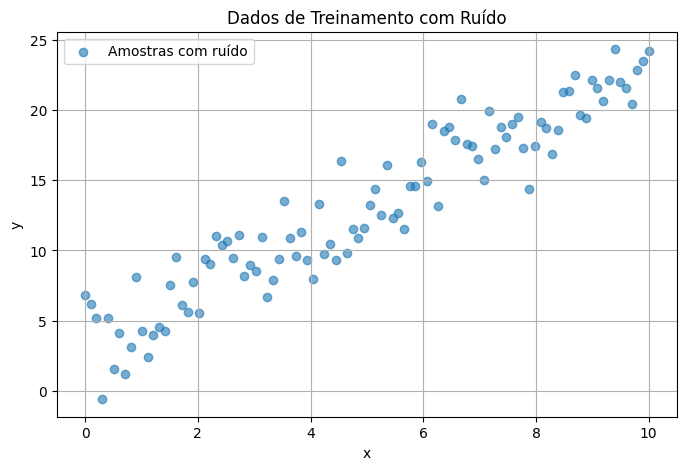

Época 20: Loss = 6.1262, w = 2.4361, b = 0.1997
Época 40: Loss = 5.7157, w = 2.3937, b = 0.4819
Época 60: Loss = 5.3792, w = 2.3553, b = 0.7374
Época 80: Loss = 5.1035, w = 2.3205, b = 0.9686
Época 100: Loss = 4.8775, w = 2.2890, b = 1.1780
Época 120: Loss = 4.6924, w = 2.2605, b = 1.3675
Época 140: Loss = 4.5406, w = 2.2347, b = 1.5390
Época 160: Loss = 4.4163, w = 2.2114, b = 1.6944
Época 180: Loss = 4.3143, w = 2.1902, b = 1.8350
Época 200: Loss = 4.2308, w = 2.1711, b = 1.9622


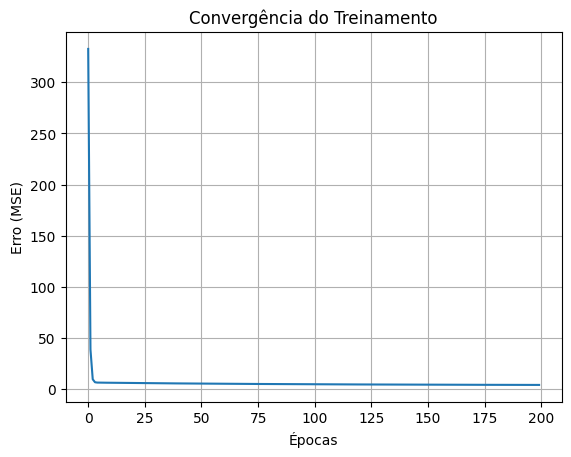

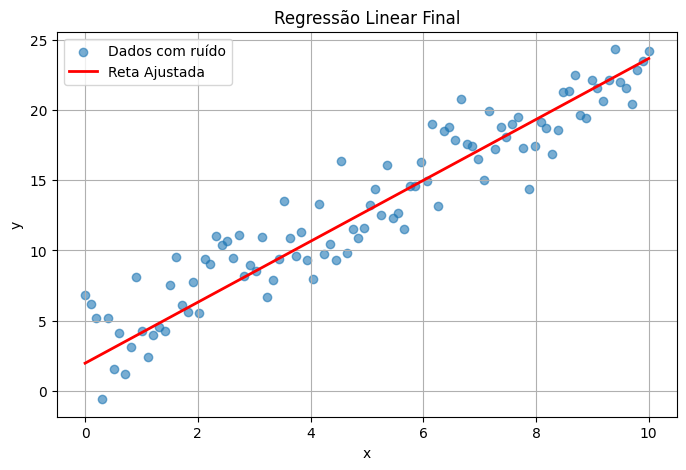


📌 Parâmetros aprendidos:
w (inclinação): 2.1711
b (bias): 1.9622


In [1]:
# 🧩 Etapa 0 — Imports
import torch
import matplotlib.pyplot as plt
import numpy as np

# 🔢 Etapa 1 — Gerando dados sintéticos com ruído
torch.manual_seed(42)  # Reprodutibilidade
X = torch.linspace(0, 10, 100).view(-1, 1)  # 100 amostras entre 0 e 10
true_w = 2.0
true_b = 3.0
noise = torch.randn(X.size()) * 2
Y = true_w * X + true_b + noise  # Relação linear + ruído gaussiano

# 📊 Visualização dos dados
plt.figure(figsize=(8,5))
plt.scatter(X.numpy(), Y.numpy(), label='Amostras com ruído', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dados de Treinamento com Ruído")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 Etapa 2 — Inicializando os parâmetros do modelo
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 🔮 Etapa 3 — Definindo a função de previsão
def forward(x):
    return w * x + b

# 📉 Etapa 4 — Definindo a função de custo: Erro Quadrático Médio
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

# 🧪 Etapa 5 — Treinamento manual com gradiente descendente
learning_rate = 0.01
n_epochs = 200

losses = []

for epoch in range(n_epochs):
    # Passo forward
    y_hat = forward(X)
    loss = mse_loss(y_hat, Y)
    losses.append(loss.item())

    # Retropropagação
    loss.backward()

    # Atualização dos parâmetros
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

    # Exibindo progresso a cada 20 épocas
    if (epoch + 1) % 20 == 0:
        print(f"Época {epoch+1}: Loss = {loss.item():.4f}, w = {w.item():.4f}, b = {b.item():.4f}")

# 📈 Etapa 6 — Visualizando a curva de erro
plt.plot(losses)
plt.xlabel("Épocas")
plt.ylabel("Erro (MSE)")
plt.title("Convergência do Treinamento")
plt.grid(True)
plt.show()

# 📊 Etapa 7 — Visualizando a reta ajustada final
with torch.no_grad():
    y_pred_final = forward(X)

plt.figure(figsize=(8,5))
plt.scatter(X.numpy(), Y.numpy(), label="Dados com ruído", alpha=0.6)
plt.plot(X.numpy(), y_pred_final.numpy(), label="Reta Ajustada", color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear Final")
plt.legend()
plt.grid(True)
plt.show()

# 🧠 Parâmetros finais
print("\n📌 Parâmetros aprendidos:")
print(f"w (inclinação): {w.item():.4f}")
print(f"b (bias): {b.item():.4f}")
